<a href="https://colab.research.google.com/github/hainmit09/DataAnalysis/blob/main/B%C3%A0i_4_L%C3%A0m_s%E1%BA%A1ch_d%E1%BB%AF_li%E1%BB%87u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tiền xử lý dữ liệu 1
- Kiểm tra, xóa bỏ, thay thế dữ liệu khuyết thiếu
- Phát hiện dữ liệu ngoại lai
- Chuẩn hóa dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from utils import *

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/hainmit09/DataAnalysis/main/OnlineRetail_small.csv", encoding="ISO-8859-1")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    1499 non-null   object 
 1   StockCode    1499 non-null   object 
 2   Description  1498 non-null   object 
 3   Quantity     1499 non-null   object 
 4   InvoiceDate  1499 non-null   object 
 5   UnitPrice    1499 non-null   float64
 6   CustomerID   1442 non-null   object 
 7   Country      1490 non-null   object 
dtypes: float64(1), object(7)
memory usage: 93.8+ KB


In [6]:
get_random_rows(df, size=10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
260,536394,22558,CLOTHES PEGS RETROSPOT PACK 24,48,12/1/10 10:39,1.25,13408,United Kingdom
261,536394,85152,HAND OVER THE CHOCOLATE SIGN,12,12/1/10 10:39,2.10,13408,United Kingdom
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/1/10 10:39,2.55,13408,United Kingdom
263,536394,22652,TRAVEL SEWING KIT,20,12/1/10 10:39,1.65,13408,United Kingdom
264,536395,22188,BLACK HEART CARD HOLDER,8,12/1/10 10:47,3.95,13767,United Kingdom
265,536395,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 10:47,1.69,13767,United Kingdom
266,536395,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,12/1/10 10:47,0.55,13767,United Kingdom
267,536395,84991,60 TEATIME FAIRY CAKE CASES,24,12/1/10 10:47,0.55,13767,United Kingdom
268,536395,21212,PACK OF 72 RETROSPOT CAKE CASES,24,12/1/10 10:47,0.55,13767,United Kingdom
269,536395,21484,CHICK GREY HOT WATER BOTTLE,8,12/1/10 10:47,3.45,13767,United Kingdom


# Tìm ra vị trí lỗi và null.
sử dụng hàm isna

In [7]:
na = df.isna()

In [8]:
type(na)

pandas.core.frame.DataFrame

In [9]:
na.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [10]:
type(na.Description)

pandas.core.series.Series

In [11]:
na.Description

0       False
1       False
2       False
3       False
4       False
        ...  
1494    False
1495    False
1496    False
1497    False
1498    False
Name: Description, Length: 1499, dtype: bool

In [12]:
na.Description | na.CustomerID | na.Country

0       False
1       False
2       False
3       False
4       False
        ...  
1494     True
1495     True
1496     True
1497     True
1498     True
Length: 1499, dtype: bool

In [13]:
pd.set_option('display.max_rows', None)

In [14]:
df[na.Description | na.CustomerID | na.Country]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
40,536370,22900 SET 2 TEA TOWELS I LOVE LONDON,24,12/1/10 8:45,2.95,12583.00,France,NaN
521,536409,22900 SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,2.95,17908.00,United Kingdom,NaN
537,536409,22900 SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,2.95,17908.00,United Kingdom,NaN
611,536412,22900 SET 2 TEA TOWELS I LOVE LONDON,2,12/1/10 11:49,2.95,17920.00,United Kingdom,NaN
617,536412,22900 SET 2 TEA TOWELS I LOVE LONDON,2,12/1/10 11:49,2.95,17920.00,United Kingdom,NaN
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
641,536415,22900 SET 2 TEA TOWELS I LOVE LONDON,3,12/1/10 11:57,2.95,12838.00,United Kingdom,NaN
927,536500,22900 SET 2 TEA TOWELS I LOVE LONDON,7,12/1/10 12:35,2.95,17377.00,United Kingdom,NaN
1057,536522,72800B 4 PURPLE FLOCK DINNER CANDLES,2,12/1/10 12:49,2.55,15012.00,United Kingdom,NaN
1164,536528,22900 SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 13:17,2.95,15525.00,United Kingdom,NaN


Tính giá thành của các dòng hóa đơn, bị lỗi, do dữ liệu vẫn còn lỗi

In [15]:
df['total'] = df.UnitPrice*df.Quantity.astype('int64')

ValueError: ignored

# Sử dụng hàm dropna để xóa những dòng bị chứa các cell (ổ dữ liệu) rỗng hoặc null <br>
DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)[source]

In [ ]:
clean_df = df.dropna(inplace=False)

In [ ]:
clean_df.info()

In [ ]:
clean_df['Quantity'].astype('int64')

In [ ]:
clean_df['total'] = clean_df['Quantity'].astype('int64') * clean_df['UnitPrice'] 

In [ ]:
clean_df.info()

In [ ]:
clean_df.head()

# Tự điền dữ liệu tự động, sử dụng hàm fillna
- Cú pháp: <i>DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)</i>
- value: Là giá trị cụ thể, ví dụ fillna(15)
- value: Có thể là từ điển {'A':15, 'B':-5, 'D':7}
- method: là phương án lấp các ô (cell) na (not available) - sử dụng khi không truyền tham số value. Method thì có các giá trị <i>backfill’, ‘bfill’, ‘pad’, ‘ffill’, 'None'</i>
  + ffill: thay thế bằng giá trị trước. Nếu axis = 0, thay thế bằng ô phía trước tính theo dòng. Nếu axis=1, thì lấy ô phía trước nhưng tính theo cột để thay vào.
  + bfill: tương tự như ffill nhưng lấy phía sau.

** Bài tập: Chạy thử ví dụ theo đường dẫn sau:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

# Xử lý dữ liệu ngoại lai

In [ ]:
clean_df['total'] = clean_df['Quantity'] * clean_df['UnitPrice'] 

In [ ]:
sns.boxplot(x=clean_df.UnitPrice)

In [ ]:
plt.scatter(range(df.shape[0]), y = df.UnitPrice)

In [16]:
df_4 = pd.read_csv("https://raw.githubusercontent.com/hainmit09/DataAnalysis/main/investment.csv")

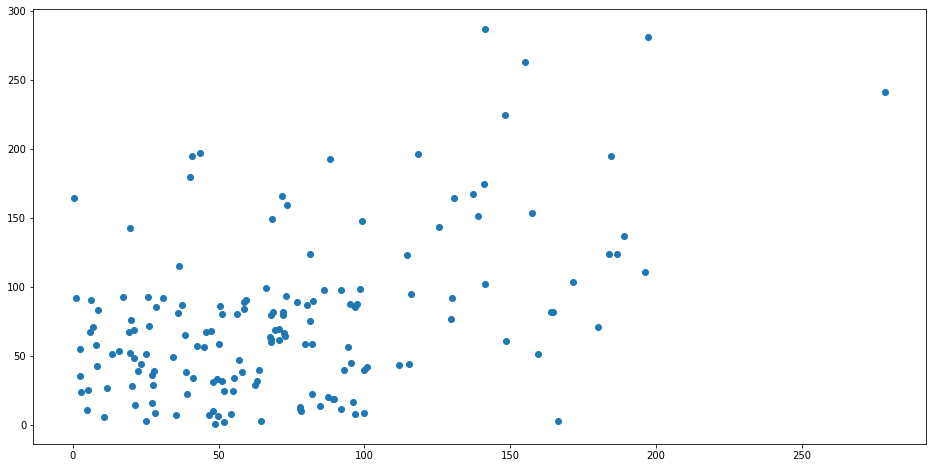

In [18]:
plt.figure(figsize=(16,8))
plt.scatter(x=df_4['Tiền đầu tư'], y=df_4['Lợi nhuận'])

In [ ]:
df_4.to_csv("final.csv")

In [ ]:
sns.boxplot(x=df_4['Lợi nhuận'])

Xác định dữ liệu Ngoại lại bằng phương pháp IQR Score, bao gồm các bước
- Tính Q1 = data.quantile(0.25)
- Tính Q3 = data.quantile(0.75)
- Tính IQR = Q3-Q1
- Những điểm ngoại lại: <i>data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))</i>
- Những điểm không phải ngoại lại: <i>data > (Q1 - 1.5 * IQR)) & (data < (Q3 + 1.5 * IQR))</i>



In [ ]:
plt.hist(df_4['Lợi nhuận'])

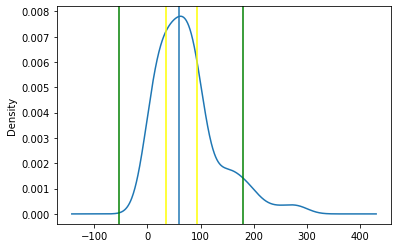

In [19]:
df_4['Lợi nhuận'].plot.density()
q1 = df_4['Lợi nhuận'].quantile(0.25)
q3 = df_4['Lợi nhuận'].quantile(0.75)
irq = q3-q1
plt.axvline(q1, color='yellow')
plt.axvline(q3, color='yellow')
plt.axvline(irq)
plt.axvline(q1-1.5*irq, color='green')
plt.axvline(q3+1.5*irq, color='green')

**Câu hỏi: So sánh kết quả hai câu lệnh sau
- data = data[data > (Q1 - 1.5 * IQR)) & (data < (Q3 + 1.5 * IQR)).any(axis=1)]
- data = data[(~(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1))]

# Xử lý dữ liệu ngoại lai sử dụng phương pháp Z-Score
- Sử dụng hàm zscore của thư viện scipy: from scipy import stats
- Tính zscore: z = np.abs(stats.zscore(data))
- Sử dung: np.where(z > threshold). Nghĩa là z>threshold là ngoại lai, z<= threshold thì là dữ liệu không phải ngoại lai
- threshold thường là 3

In [20]:
from scipy import stats

In [21]:
z = np.abs(stats.zscore(df_4))

In [22]:
type(z)

numpy.ndarray

In [23]:
z.shape

(160, 3)

In [ ]:
df_4.head()

In [24]:
np.where(z>3)

(array([ 75,  76, 157, 159]), array([2, 2, 1, 2]))

In [ ]:
np.where(z<0)

In [ ]:
np.size(np.where(z>3))

In [ ]:
z

In [25]:
df_5 = df_4[(z<3).all(axis=1)]

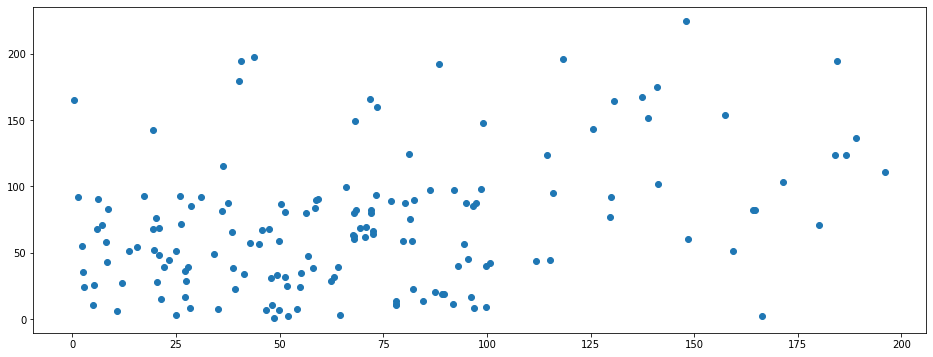

In [27]:
plt.figure(figsize=(16,6))
plt.scatter(x=df_5['Tiền đầu tư'], y=df_5['Lợi nhuận'])

In [ ]:
df_5.info()

Phần này xem thêm trong bài thực hành

# Chuẩn hóa dữ liệu

In [ ]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(df_5)

In [ ]:
sns.kdeplot(data=df_5)

In [ ]:
sns.kdeplot(data=df_s)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
df_mm = mm_scaler.fit_transform(df_5)


In [ ]:
sns.kdeplot(data=df_mm)

In [ ]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
df_r = r_scaler.fit_transform(df_5)


In [ ]:
sns.kdeplot(data=df_r)